**参考来源：**<br>

【1】：茆诗松等，《概率论与数理统计教程（第二版）》，2011年，高等教育出版社<br>
【2】：贾俊平等，《统计学（第八版）》，2021年，中国人民大学出版社<br>



# 第五章 点估计与区间估计（商品的价格）【1+数理统计基础PPT】

在许多情况下，若要精确估计总体参数是相当困难的，因而我们往往通过样本提供的信息对其进行估计。例如，为估计北京市二手房在某月的平均价格，若想统计北京所有二手房的价格，显然难度太大。但可以从总体中抽取样本，用样本数据来估计总体。因此，**参数估计**是指在一致总体分布分类型而对总体数字体征（总体参数）进行的估计，即用样本统计量对总体参数进行估计。参数估计的形式有两种：点估计和区间估计。本章将重点介绍点估计和区间估计的概念及相关python应用。





## 5.1 基本原理

### 5.1.1 抽样分布

样本来自总体，因此样本中含有总体各方面的信息，但这些信息较为分散，有时显得杂乱无章。为将这些分散在样本中的有关总体的信息集中起来以反映总体的各种特征，需要对样本进行加工，表和图是一类加工形式，它使人们从中获得对总体的初步认识。当人们需要从样本获得对总体各种参数的认识时，最常用的加工方法是构造统计量，不同的统计量反映总体的不同特征定义。<p>
**统计量**：设$x_1,x_2,⋯,x_n$为取自某总体的样本，若样本函数$T=T(x_1,x_2,⋯,x_n )$中不含有任何未知参数，则T称为统计量。常用的统计量有均值、方差、标准差、峰度、偏度、变异系数等。<p>
**抽样分布**：也称作统计量分布、随机变量函数分布，是指从已知的总体中以一定的样本容量进行随机抽样，由样本的统计量所对应的概率分布。常见的三大抽样分布有卡方分布、T分布、F分布。另外，常用的分布还有正态分布，下面讲着重简介这四个分布。<p>

#### （1）正态分布 <p>

正态分布是最常见的连续型随机变量的分布，如果随机变量X的概率密度函数为：<p>
$$f(x)=\dfrac{1}{\sqrt{2\pi\sigma^2}} e^{-\dfrac{1}{2\sigma^2}(x-\mu)^2 }, -\infty<x<\infty$$<p>
则称随机变量$X$为正态随机变量，或称X服从参数为$\mu$,$\sigma^2$的正态分布，记为$X\sim N(\mu,\sigma^2)$。其中：$\mu$和$\sigma^2$分别为随机变量X的期望和方差。<p>

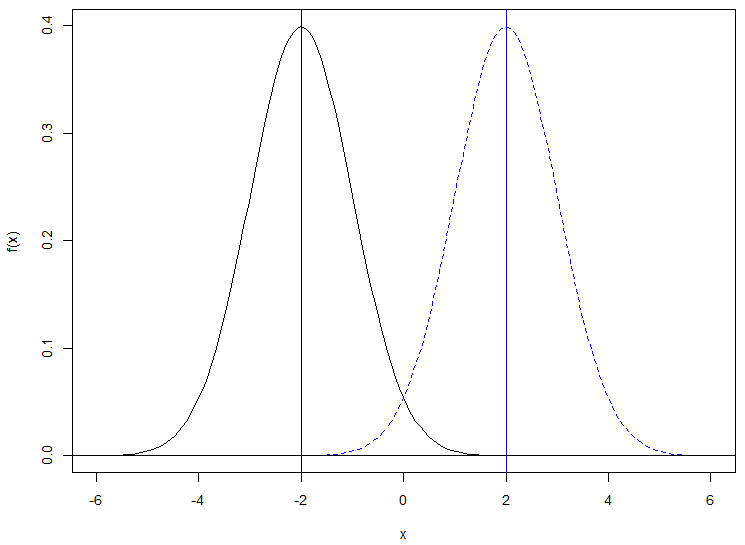

**<center>图：$\mu$不同，$\sigma^2$相同的正态分布曲线</center>**

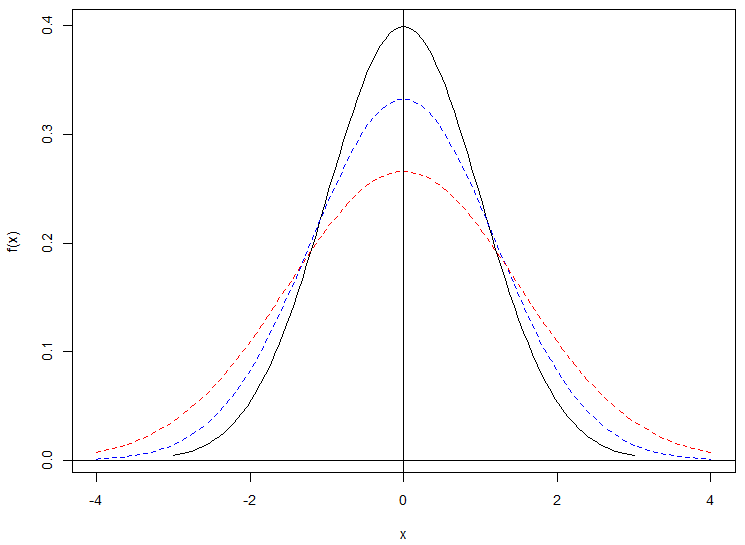

**<center>图：$\mu$相同，$\sigma^2$不同的正态分布曲线</center>**

需注意：正态曲线图形是关于$x=\mu$对称的钟形曲线，峰值在$x=\mu$处；正态曲线图形由$\mu$和$\sigma^2$来确定。$\mu$决定曲线的位置，$\sigma^2$决定曲线的离散程度； 正态曲线图形两端无限接近于水平轴，但不会与水平轴交汇；正态曲线图形下的总面积等于1.<p>

 **<font color='blue'>【例5.1.1-1：生成正态分布随机数】**</font>：假设某商品的价格服从均值80，标准差1的正态分布。按照此要求随机生成100个整数价格数据。

In [1]:
from scipy import stats
data_norm=stats.norm.rvs(80,1,size=100)
print(data_norm)

[80.59945194 80.16261799 80.32372443 78.27051696 79.34453487 80.27488011
 78.4014957  79.84644385 81.04014709 80.44094563 81.54662772 80.90131032
 80.50809282 81.95033744 80.08523819 77.87022696 77.20755139 79.50514145
 79.85945753 79.61184122 79.53481629 78.94050702 80.01926782 81.133476
 80.76124085 79.82313062 80.4080803  81.27073925 80.66318619 78.77707536
 79.97854854 78.47453531 81.11590514 79.99820536 80.63839481 79.90447818
 80.60110478 80.01720786 80.68426961 80.59853708 81.30781231 80.29552282
 80.55869355 80.02626503 80.96192433 80.41617036 80.57172155 79.88403609
 80.13772088 78.89633515 79.2120368  80.02582693 78.84318318 79.35981009
 78.61603615 79.30612746 80.08613984 78.92290777 80.69985214 78.13063527
 79.29101803 82.01950355 78.86096725 79.25936714 78.82524852 80.10337352
 79.92089252 80.01132974 78.47081181 78.40660237 80.09105892 80.07510208
 79.11420337 79.12360989 82.14312468 80.17586698 79.3591254  79.58079567
 79.06035964 80.40464636 80.22233915 79.55317866 79.7

<font color='blue'>**例题解析**</font>

**stats.norm.rvs(loc,scale,size)**生成符合正态分布的随机变量。参数loc表示正态分布的均值、scale表示正态分布的标准差、size表示返回的数据形式（数组、矩阵等，默认为None,返回一个数）。另外，stats.t/stats.chi2/stats.f分别为T、卡方、F分布所对应的函数库。

 **<font color='blue'>【例5.1.1-2：绘制概率密度图】**</font>：在[-5,5]之间随机生成100000个数据，绘制其概率密度图。<p>

Text(0.5, 1.0, 'normal distribution')

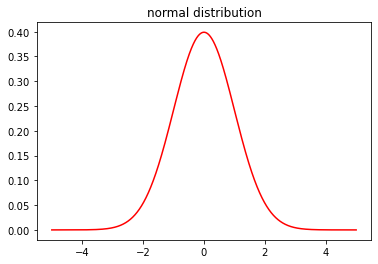

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
x = np.linspace(-5,5,100000)
y = stats.norm.pdf(x,0,1)
plt.plot(x,y,c="red")
plt.title('normal distribution')

<font color='blue'>**例题解析**</font>

**stats.norm.pdf(x,loc,scale)**返回x的概率密度函数值，loc、scale仍表示均值和标准差。stats.norm下的常用方法:rvs:随机变量；pdf：概率密度函数；cdf：累计分布函数；sf：残存函数（1-CDF）；ppf：分位点函数（CDF的逆）；isf：逆残存函数（sf的逆）；stats:返回均值，方差，（费舍尔）偏态，（费舍尔）峰度。

 **<font color='blue'>【例5.1.1-3：计算分位点】**</font>：设显著水平$\alpha=0.05$，计算标准正态分布的单侧左、右分位点$-z_{0.05}$,$z_{0.05}$和双侧左、右分位点$-z_{0.025}$、$z_{0.025}$

In [3]:
from scipy import stats                    #导入norm
alpha=0.05                                      #设置alpha
b=stats.norm.isf(q=alpha)                             #计算单侧右分位点
a=-b                                            #单侧左分位点
print('单侧左、右分位点：a=%.4f,b=%.4f'%(a, b)) 	#输出精确到万分位
a, b=stats.norm.interval(1-alpha)                     #计算双侧分位点
print('双侧左、右分位点：a=%.4f,b=%.4f'%(a, b)) 	#输出精确到万分位

单侧左、右分位点：a=-1.6449,b=1.6449
双侧左、右分位点：a=-1.9600,b=1.9600


<font color='blue'>**例题解析**</font>

stats.norm.interval(alpha, loc, scale)返回双侧分位点或区间范围，alpha为置信水平，loc为均值，scale为标准误差，需特殊注意的是标准误差不同于标准误。$\sigma$为标准误的话，对于大样本来说，标准误差sem为$\sigma/\sqrt{n}$；对于小样本来说，标准误为$s/\sqrt{n-1}$。在python中，可以通过stats.sem()来计算。

#### （2）$\chi^2$分布<p>
$\chi^2$分布是由Abbe于1963年首先提出来的，后来有Hermert和K.Pearson分别于1875年和1900年推导出来。$\chi^2$分布定义为：n个独立标准正态随机变量平方和的分布，称为具有n个自由度的$\chi^2$分布，记为$\chi^2(n)$。$\chi^2$分布的形状取决于其自由度n的大小，通常为不对称右偏分布，并随着自由度n的增大逐渐对称。<p>
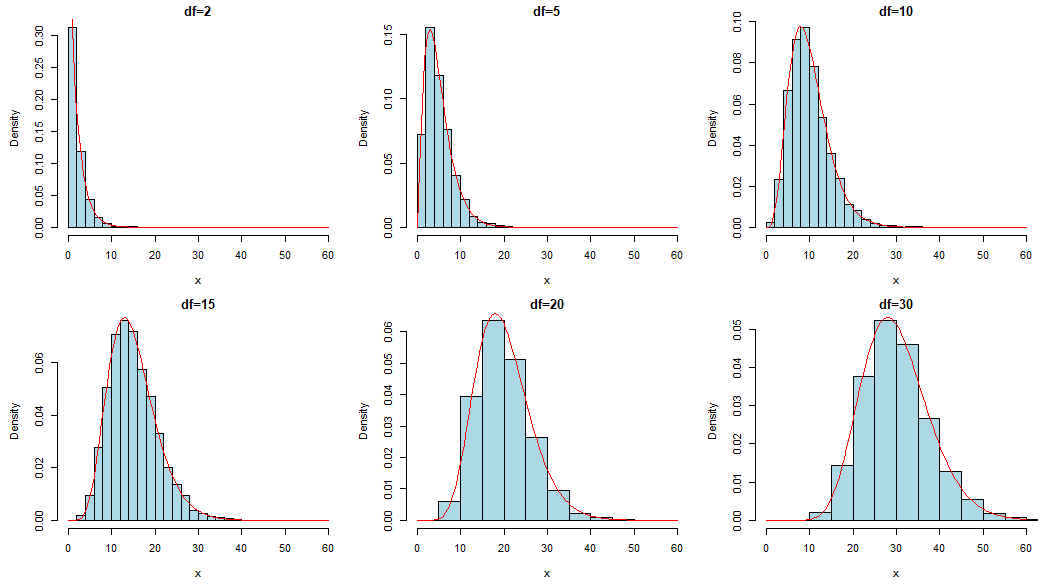
**<center>图:不同自由度的$\chi^2$分布</center>**

**<font color='blue'>【例5.1.1-4：计算概率值及反函数值】**</font>，计算下面概率<p>
(1) 自由度为15，$\chi^2$值小于10的概率<p>
(2) 自由度为10，$\chi^2$分布累计概率为0.95时的反函数值。

In [4]:
from scipy import stats
p=stats.chi2.cdf(10,df=15)         #自由度为15时，卡方小于10的概率
q=stats.chi2.ppf(0.95,df=10)          #自由度为10 ，累计概率为0.95的反函数值
print(p,q)

0.18026008049639844 18.307038053275146


<font color='blue'>**例题解析**</font>

python中正态分布相关函数为stats.norm；卡方分布相关函数为stats.chi2；T分布相关函数为stats.t；F分布相关函数为stats.f。

#### （3）$t$分布 <p>
t分布的提出者是William Gosset，由于他经常用笔名“student”发表文章，也称为学生t分布(student's t)。设随机变量$Z \sim N(0,1)$，$X \sim \chi^2(n)$，且Z与X独立，则称随机变量$T=\dfrac{Z}{\sqrt{X/n}}$服从自由度为n的t分布，记为$T \sim  t(n)$。<p>
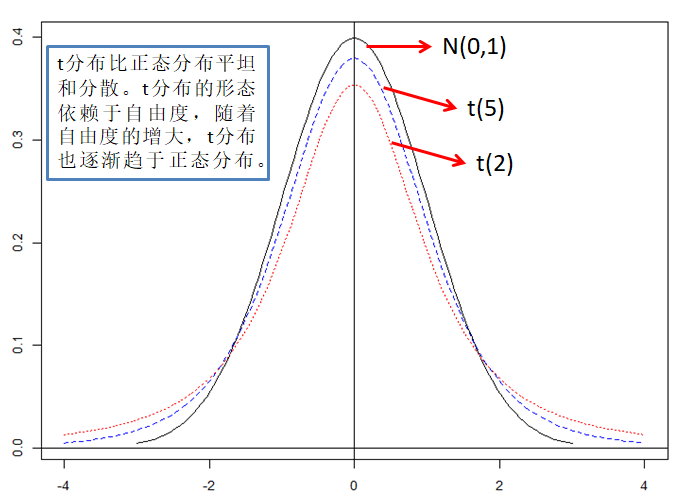
**<center>图:不同自由度的$t$分布</center>**

**<font color='blue'>【例5.1.1-5：绘制不同自由度的学生t分布曲线】**</font>在[-5,5]之间随机生成100个数据，绘制自由度为1、5、10、20的T分布曲线，并于正态分布曲线做比较。<p>

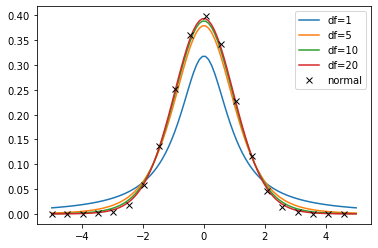

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
x = np.linspace( -5, 5, 100)
plt.plot(x, stats.t.pdf(x,1), label='df=1')
plt.plot(x, stats.t.pdf(x,5), label='df=5')
plt.plot(x, stats.t.pdf(x,10), label = 'df=10')
plt.plot(x, stats.t.pdf(x,20), label = 'df=20')
plt.plot( x[::5], stats.norm.pdf(x[::5]),'kx', label='normal')
plt.legend()
plt.show()

<font color='blue'>**例题解析**</font>

由图可以看出，当随着自由度的增加，T分布也逐渐趋近于正态分布。

#### （4）$F$分布<p>
F分布是纪念著名统计学家R.A.Fisher以其姓氏的第一个字母命名的分布形式。F分布是两个$\chi^2$分布变量调整自由度后之比。设$U\sim \chi^2(n_1)$，$V \sim \chi^2(n_2)$，且U和V相互独立，则$F=\dfrac{U/n_1}{V/n_2}$服从自由度为$n_1$和$n_2$的F分布，记为$F\sim  F(n_1,n_2)$。<p>
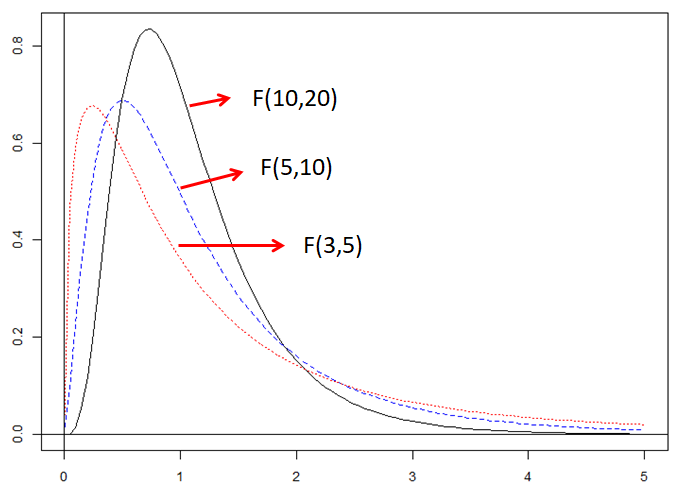
**<center>图:不同自由度的$F$分布</center>**

**<font color='blue'>【例5.1.1-6：绘制不同自由度的学生F分布曲线】**</font>在[0,5]之间随机生成100个数据，绘制自由度为（10，20），（5，10），（3，5）的T分布曲线。<p>

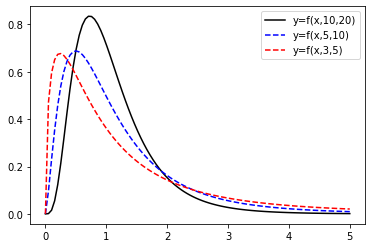

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
x = np.linspace(0,5,100)
plt.plot(x, stats.f.pdf(x,10,20), 'k-',label='y=f(x,10,20)')
plt.plot(x, stats.f.pdf(x,5,10), 'b--',label='y=f(x,5,10)')
plt.plot(x, stats.f.pdf(x,3,5), 'r--',label='y=f(x,3,5)')
plt.legend()
plt.show()

<font color='blue'>**例题解析**

F分布的形状依赖于分子和分母的自由度，分布不对称，在第一象限。

### 5.1.2 点估计

**点估计**就是用样本统计量$\hat{\theta}$的某个取值直接作为总体参数$\theta$的估计值。比如，用样本均值$\bar{x}$了直接作为总体均值$\mu$的估计值，用样本比例$p$直接作为总体比例的估计值，用样本方差$s^2$直接作为总体方差$\sigma^2$的估计值,等等。 假定要估计一个班学生考试成绩的平均分数，根据抽出的一个随机样本计算的平均分数为80分，用80分作为全班平均考试分数的一个估计值， 这就是点估计。再比如，若要估计一批产品的合格率，抽样结果合格率为96%，将96％直接作为这批产品合格率的估计值，这也是一个点估计。<p>
虽然在重复抽样条件下点估计的均值有望等于总体真值（比如,$E(\bar{x})=\mu)$， 但由于样本是随机的，抽出一个具体的样本得到的估计值很可能不同于总体真值。 在用点估计值代表总体参数值的同时，还必须给出点估计值的可靠性，也就是说，必须能说出点估计值与总体参数的真实值接近的程度。但一个点估计值的可靠性是由它的抽样标准误差来衡量的，这表明一个具体的点估计值无法给出估计的可靠性的度量，因此就不能完全依赖于一个点估计值，而是围绕点估计值构造总体参数的一个区间，这就是区间估计。<p>

### 5.1.3 区间估计

假定参数是射击靶上10环的位置，进行一次射击，打在靶心10环的位置上的可能性很小，但打在靶子上的可能性很大，用打在靶上的这个点画出一个区间， 这个区间包含靶心的可能性就很大，这就是区间估计的基本思想。<p>
#### （1）区间估计定义
**区间估计**是在点估计的基础上，给出总体参数估计的一个区间范围，该区间通常由样本统计量加减估计误差得到。与点估计不同，进行区间估计时，根据样本统计量的抽样分布可以对样本统计量与总体参数的接近程度给出一个概率度量。<p>
#### （2）置信区间
在区间估计中，由样本统计量所构造的总体参数的估计区间称为**置信区间**，其中，区间的最小值称为**置信下限**，最大值称为**置信上限**。置信区间中包含总体参数真值的次数所占的比例称为**置信水平**，也称为置信度或置信系数。比如设$\hat{\theta_1}$和$\hat{\theta_2}$是两个统计量（$\hat{\theta_1}<\hat{\theta_2}$)，分别作为总体参数$\theta$区间估计的上限和下限，则要求有：<p>
$$P(\hat{\theta_1}\leq\hat{\theta}\leq\hat{\theta_2})=1-\alpha$$<p>
式中，$\alpha(0<\alpha<1)$就是区间估计的显著水平，其取值大小由实际问题决定，通常人们取5%和10%，$1-\alpha$称为置信度，$[\hat{\theta_1},\hat{\theta_2}]$是置信度$1-\alpha$的置信区间。图示如下图所示。<p>
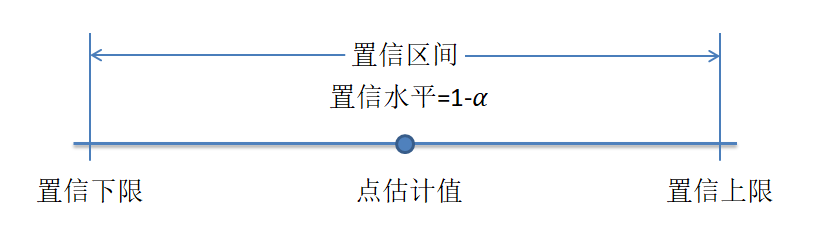
区间估计的特点是，给出总体参数的一个估计区间,这个区间恰好包含这个参数的概率不要求达到1,可放低要求，减去一个小概率的显著性水平,达到1一a即可。置信区间表达了区间估计的准确性(或精确性)，置信度表达了区间估计的可靠性，它是区间估计的可靠概率；而显著性水平表达了区间估计的不可靠概率。例如$\alpha=0.01$或1%是说用置信区间来估计总体参数,平均100次有1次会产生错误。<p>当然，这里我们应该注意,在进行区间估计时，必须同时考虑置信度和置信区间两个方面，即置信度定的愈大(即估计的可靠性愈大)，则置信区间相应也愈大(即估计准确性愈小)。所以，可靠性和准确性要结合具体问题，具体要求来全面考虑。<p>
比如，由样本均值的抽样分布可知，在重复抽样或无限总体抽样的情形下，样本均值的期望等于总体均值，即$E(\bar x)=\mu$，样本均值的标准误为$\sigma_{\bar{x}}=\sigma/\sqrt{n}$。由此可知，样本均值$\bar{x}$落在总体均值$\mu$的两侧的概率如下图所示:

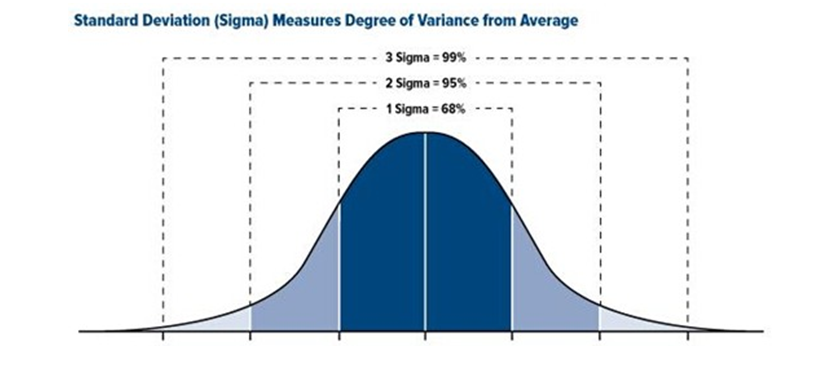

实际上，除了求得样本均值落在1倍、2倍、3倍标准误范围内的概率，还可以求得落在任何倍数的标准误范围内的概率。比如，样本均值$\bar{x}$落在总体均值$\mu$的两侧1.65倍标准误、1.96倍标准误、2.58倍标准误范围内的概率分别是90\%、95\%、99\%。
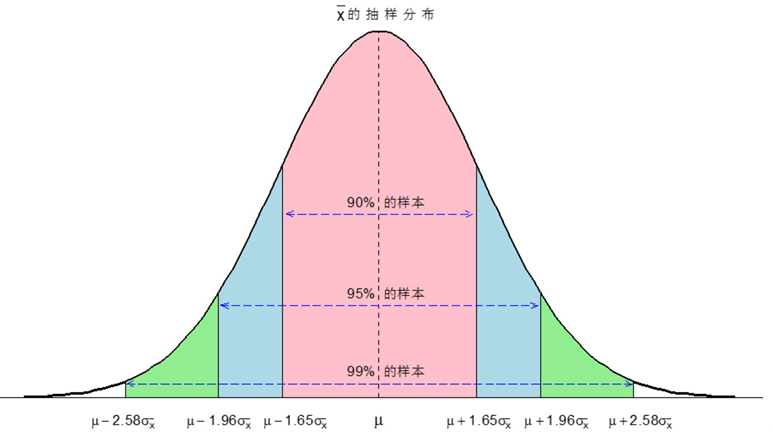

**对置信区间的理解，应注意如下几点**：<p>
首先，如果用某种方法构造的区间中有95\%的区间包含总体参数的真值，5$\%$不包含真值，那么该方法构造的区间称为置信水平为95\%的置信区间。其次，总体参数的真值是固定的，而用样本构造的区间则是不固定的，因此置信区间是一个随机区间，它随着样本的不同而不同。

### 5.1.4 评价估计量的标准
用于估计总体参数$\theta$的估计量$\hat{\theta} $可以有很多，那么选取哪一个呢？主要取决于估计量是否是无偏估计、有效估计、一致估计。
#### （1）无偏性
**无偏性**(unbiasedness)是指估计量抽样分布的期望值等于被估计的总体参数。设总体参数为$\theta$，所选择的估计量为$\hat{\theta}$，如果$E(\hat{\theta})=\theta$，则称$\hat{\theta}$是$\theta$的无偏估计量。
#### （2）有效性
**有效性**(efficiency)是指估计量的方差大小。假定有两个用于估计总体参数的无偏估计量，分别为$\hat\theta_1$和$\hat\theta_2$，它的方差分别为$D(\hat\theta_1)$和$D(\hat\theta_2)$，如果$\hat\theta_1$的方差小于$\hat\theta_2$的方差，即$D(\hat\theta_1)<D(\hat\theta_2)$，就称$\hat\theta_1$是比$\hat\theta_2$更有效的一个估计量。
#### （3）一致性
**一致性**(consistency)是指随着样本量的无限增大，统计量收敛于所估计总体的参数。换言之，一个大样本得到的估计量更接近总体参数. 由于样本均值的标准误$\sigma_{\bar{x}}=\sigma/\sqrt{n}$与样本量大小有关，样本量越大，$\sigma_{\bar{x}}$的值就越小。



## 5.2 一个总体的区间估计

在对一个总体进行研究时，我们往往关心总体均值$\mu$、总体方差$\sigma^2$、总体比例等，本节将介绍如何用样本统计量来构造一个总体参数的置信区间。



### 5.2.1 总体均值的置信区间

研究一个总体时，推断总体均值$\mu$的统计量就是样本均值$\bar{x}$. 研究两个总体时，所关心的参数主要就是两个总体均值之差$(\mu_1-\mu_2)$，用于推断的统计量则是两个样本的均值之差$(\bar{x}_1-\bar{x}_2)$。对一个总体均值进行区间估计时，需要考虑抽取样本的总体是否为正态分布、总体方差是否已知、用于估计的样本是大样本($n\geq30$)还是小样本($n<30$)等情形。不管是那种情形，总体均值的置信区间都是由\textbf{样本均值加减估计误差}得到的。估计误差由两部分组成：一是点估计的标准误,二是估计所要求的置信水平为$(1-\alpha)$时，统计量分布两侧面积各为$\alpha/2$时的分位数值。总体均值在$(1-\alpha)$置信水平下的置信区间可一般性地表达为：<p>
$$\bar{x} \ \pm ( Quantile \times Standard \  Error \  of \  \bar{x})$$

#### （1）大样本<p>
**a.当总体服从正态分布且总体方差$\sigma^2$已知时**，总体均值$\mu$在(1-$\alpha$)置信水平下的置信区间为:
$$\bar{x} \ \pm \ z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}$$
式中，$\bar{x} \ - \ z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}$称为置信下限，$\bar{x} \ + \ z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}$称为置信上限；$\alpha$是事先确定的一个概率值，它是总体均值不包括在置信区间的概率，$1-\alpha$称为置信水平；$z_{\alpha/2}$是标准正态分布两侧面积各位$\alpha/2$时的z值；$z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}$是估计误差。<p>
**b.当总体服从正态分布且总体方差$\sigma^2$未知时**，式中的$\sigma$可以用$s$代替，这时总体均值$\mu$在$(1-\alpha)$置信水平下的置信区间为：
$$\bar{x} \ \pm \ z_{\alpha/2}\dfrac{s}{\sqrt{n}}$$
**c.当总体服从非正态分布时**，但样本量足够大，其样本均值的抽样分布仍服从正态分布，即$\bar{x}\sim N(\mu,\sigma^2/n)$。其中$\mu$为总体均值，$\sigma^2$为总体方差。当样本均值经过标准化后的随机变量服从标准正态分布，即：<p>
$$z=\frac{\bar{x}-\mu}{\sigma / \sqrt{n}} \sim N(0,1)$$
根据正态分布的性质可知，总体均值$\mu$在$1-\alpha$置信水平下的置信区间为：<p>
$$[\bar{x}-z_{\alpha/2}\frac{\sigma}{\sqrt{n}},\bar{x}+z_{\alpha/2}\frac{\sigma}{\sqrt{n}}]$$<p>
可见，当样本量较大时，无论总体方差$\sigma^2$已知还是未知，无论总体是否服从正态分布，都可以用正态分布来近似。<p>

**<font color='blue'>【例5.2.1-1一个总体均值估计、大样本、方差已知】</font>**：A百货公司每周选择40名顾客组成一个简单随机样本，目的在于了解他们每次购物的消费总额。令表示每次购物的消费总额，样本均值是$\bar{x}$是A全体顾客每次购物消费总额所组成总体的均值$\mu$的点估计。根据历史数据，A现在假定总体标准差已知，为$\sigma$=20美元。并且历史数据还显示总体服从正态分布。求解总体均值的90%置信区间。

In [9]:
import pandas as pd
from scipy import stats
import math
data=pd.read_excel('data_five.xlsx',sheet_name='price_40')
print(data.head(5))# 展示前5行数据
alpha=0.90
mean=float(np.mean(data))
sigma=20
n=40
CI = stats.norm.interval(alpha,loc=mean, scale=sigma/math.sqrt(n)) # ci是置信区间
print(CI)

   price
0  790.0
1  810.0
2  750.0
3  840.0
4  780.0
(791.5485161212445, 801.9514838787555)


<font color='blue'>**例题解析**</font>

**第一步：明确总体分布和总体标准差，判断该区间估计属于哪一种类型。**题目中已给出总体标准差$\sigma$=20。即，此案例是在大样本、总体服从正态分布且总体方差已知的情况下进行参数区间估计，总体均值服从正态分布。<p>
**第二步，计算估计误差**。查表置信水平为90%的正态分布分位点。$z_{a/2}$=$z_{0.05}$= −1.644854，因此估计误差：
    $$z_{a/2}\frac{\sigma}{\sqrt{n}}= −1.644854*\frac{20}{\sqrt{100}}=-3.289708*$$
**第三步，计算样本均值$\bar{x}$。**<p>
**第四步，计算置信区间。**
     $$[\bar{x}-3.289708,\bar{x}+3.289708]$$
 **另外**：stats.norm.interval($\alpha$,loc,scale)是返回置信区间，其中$\alpha$是置信水平，取值范围在[0,1]，loc是均值，scale是标准误差，对于大样本标准误差等于$\sigma/\sqrt{n}$，对于小样本标准误差等于$\sigma/\sqrt{n-1}$ 

**<font color='blue'>【例5.2.1-2：一个总体均值、大样本、方差未知】</font>**：对于上题中，若总体方差未知，求解总体均值的90%置信区间。

In [10]:
import pandas as pd
from scipy import stats
data=pd.read_excel('data_five.xlsx',sheet_name='price_40')
alpha=0.90
mean=float(np.mean(data))
sigma=float(np.std(data))
n=40
CI = stats.norm.interval(alpha,loc=mean, scale=sigma/math.sqrt(n)) # ci是置信区间
print(CI)

(783.7542575160071, 809.7457424839929)


<font color='blue'>**例题解析**</font>

在正态分布、大样本、总体方差未知的情况下，总体均值仍服从正态分布。可以用样本标准差估计总体标准差。其他步骤与方差已知相似。

#### （2）小样本<p>
在小样本(n<30)的情形下，对总体均值的估计**一般都是建立在总体服从正态分布的假设前提**下。<p>
**如果总体方差$\sigma^2$已知**，样本均值经过标准化后仍然服从**正态分布**，总体均值$\mu$在(1-$\alpha$)置信水平下的置信区间为：<p>
$$\bar{x} \ \pm \ z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}$$<p>
**如果总体方差$\sigma^2$未知**，用样本标准差$s$代替总体方差，样本均值经过标准化后服从自由度为n-1的**t分布**. 此时，总体均值$\mu$在(1-$\alpha$)置信水平下的置信区间为：<p>
$$\bar{x} \ \pm \ t_{\alpha/2}\dfrac{s}{\sqrt{n}}$$<p>

**<font color='blue'>【例5.2.1-3：一个总体均值、小样本、方差已知】</font>**：对于5.2.1-1题中，将样本容量改为25，求解总体均值的90%置信区间。

In [11]:
import pandas as pd
from scipy import stats
data=pd.read_excel('data_five.xlsx',sheet_name='price_25')
print(data.head(5))# 展示前5行数据
alpha=0.90
mean=float(np.mean(data))
sigma=20
n=25
CI = stats.norm.interval(alpha,loc=mean, scale=sigma/math.sqrt(n)) # ci是置信区间
print(CI)

   price
0  790.0
1  810.0
2  750.0
3  840.0
4  780.0
(792.6205854921942, 805.7794145078059)


**<font color='blue'>【例5.2.1-4：一个总体均值、小样本、方差未知】</font>**：对于5.2.1-2题中，将样本容量改为25，求解总体均值的90%置信区间。

In [12]:
import pandas as pd
from scipy import stats
data=pd.read_excel('data_five.xlsx',sheet_name='price_25')
alpha=0.90
mean=float(np.mean(data))
sigma=float(np.std(data))
n=25
df=len(data)-1
CI = stats.t.interval(alpha,df,loc=mean, scale=sigma/math.sqrt(n)) # ci是置信区间
print(CI)

(782.2446147745634, 816.1553852254367)


<font color='blue'>**例题讲解**</font>

stats.t.interval(alpha,df,loc,scale)函数中多了一个参数df,其含义是自由度,计算方式为n-1。当数据为小样本、总体方差未知时，总体均值服从t分布。



### 5.2.2 总体方差的置信区间

由于样本方差是服从自由度为n-1的$\chi^2$分布，因此要用$\chi^2$分布来构造总体方差的置信区间。如图所示，由于$\chi^2$分布不是对称分布，因此不能通过点估计值 $\pm$ 估计误差的方式计算总体方差的置信区间.<p>
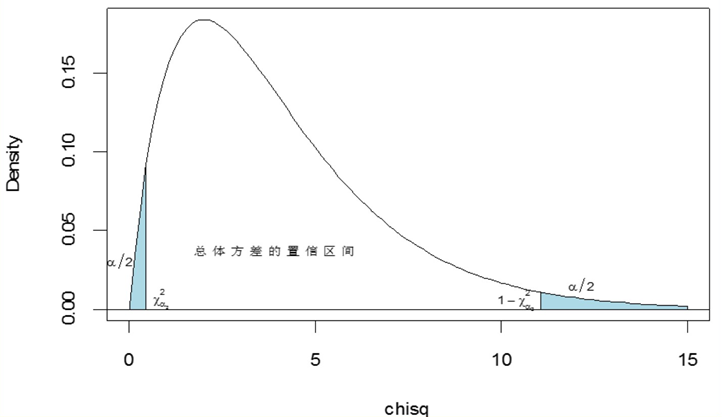
可见，要计算$\sigma^2$的置信区间，也要找到一个$\chi^2$值，使其满足个$\chi_{\alpha/2}^2 \leq \chi^2  \leq \chi_{1-\alpha/2}^2 $。对于满足分布为正态分布$N(\mu,\sigma^2)$的正态总体和样本$ X_1,X_2,...X_n$，样本方差$s^2$的抽样分布服从**自由度为$n-1$的卡方分布**：<p>
$$\frac{(n-1)s^2}{\sigma^2}\sim \chi^2(n-1)$$<P>
因此使用卡方分布来构造总体方差的置信区间，在$1-\alpha$置信水平下：<P>
$$\chi^2_{1-\alpha/2} \leq \frac{(n-1)s^2}{\sigma^2} \leq \chi^2_{\alpha/2}$$<p>
所以总体方差$\sigma^2$在$1-\alpha$置信水平下的置信区间为：<P>
$$[\frac{(n-1)s^2}{\chi^2_{1-\alpha/2}},\frac{(n-1)s^2}{\chi^2_{\alpha/2}}]$$ 



**<font color='blue'>【例5.2.2-1:一个总体方差的置信区间】</font>**：一家食品生产企业以生产袋装食品为主，每天的唱片大约为8000袋。按规定每袋的重量应为100克。为对产品重量进行监测，企业质检部门经常要进行抽检，以分析每袋重量是否符合要求，现从某天生产的一批食品中随机抽取25袋，测得每袋重量如下:112.5,102.6,100,116.6,136.8,101,107.5,123.5,95.4,102.8,103,95,102,97.8,101.5,102,108.8,101.6,108.6,98.4,100.5,115.6,102.2,105,93.3。求以95%的置信水平建立食品总体重量标准差的置信区间。

In [13]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

lst = [112.5,102.6,100,116.6,136.8,101,107.5,123.5,95.4,102.8,103,95,102,97.8,101.5,102,108.8,101.6,108.6,98.4,100.5,115.6,102.2,105,93.3]
data = pd.Series(lst)

# 已知 样本量 n = 25, 置信水平 1-a=95%
n = 25
a = 0.05
sigma = data.std()
sigma_2 = data.var()

# 计算卡方值

X2_1_a2 = stats.chi2.ppf(a/2,n-1)
X2_a2 = stats.chi2.isf(a/2,n-1)
print(X2_a2)
print(X2_1_a2)

# 计算公式
left = (n-1)*sigma_2/X2_a2
right = (n-1)*sigma_2/X2_1_a2

# 方差比为
left = np.sqrt(left)
right = np.sqrt(right)

print('该批食品总重量标准差为：{:.3f}'.format(sigma))
print('该批食品总重量标准差95%的置信区间为（{:.3f}，{:.3f}）'.format(left,right))

39.3640770266039
12.401150217444435
该批食品总重量标准差为：9.654
该批食品总重量标准差95%的置信区间为（7.538，13.431）


### 5.2.3 总体比例的置信区间

总体比例指的是：想要估计一个学校中女生占的比例，随机抽取了100个学生，其中女生有50个，那么全校学生中女生的比例是多少？这个要求的比例就是总体比例。<p>
在大样本的情况下，样本比例$p$的抽样分布也近似符合正态分布，设总体比例为$\pi$, 那么$p\sim N(\pi,\frac{\pi(1-\pi)}{n})$。与总体均值类似，可以得到$\frac{p-\pi}{\sqrt{\pi(1-\pi)/n}}\sim N(0,1)$。所以有：

$$-z_{\alpha/2}\sqrt{\frac{\pi(1-\pi) }{n}}\leq p-\pi\leq z_{\alpha/2}\sqrt{\frac{\pi(1-\pi) }{n}}$$<p>


因为总体比例$\pi$未知，在实际计算的时候就用$p$来代替：

$$-z_{\alpha/2}\sqrt{\frac{p(1-p) }{n}}\leq p-\pi\leq z_{\alpha/2}\sqrt{\frac{p(1-p) }{n}}$$<p>

所以总体比例$\pi$在$1-\alpha$的置信水平下的置信区间为

$$[p-z_{\alpha/2}\sqrt{\frac{p(1-p) }{n}},p+z_{\alpha/2}\sqrt{\frac{p(1-p) }{n}}]$$<p>
大样本的估计方法至今仍然被广泛使用，但是按照该方法计算出来的置信水平为$(1-\alpha)$的置信区间能够覆盖总体真实比例的概率通常小于$(1-\alpha)$，即使大样本(除非样本量非常大)也是如此，跟不可能应用于小样本。<p>
研究发现，对于任意大小的样本，将试验次数(样本量)$n$加4，即用$\widetilde{n}=n+4$代替$n$；将试验成功的次数$x$加上2，即用$\widetilde{p}=(x+2)/\widetilde{n}$代替$p$，可以改进置信区间.由此得到总体比例$\pi$在$(1-\alpha)$置信水平下的置信区间为：<p>
$$\widetilde{p} \pm z_{\alpha/2} \sqrt{\frac{\widetilde{p}(1-\widetilde{p})}{\widetilde{n}}}$$

 **<font color='blue'>【例5.2.3-1：总体比例的置信区间】</font>**：某城市想要估计下岗职工中女性所占的比例，随机抽取了100个下岗职工，其中65人为女职工，试以95%的置信水平估计该城市下岗职工中女性比例的置信区间。

In [14]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

# 样本量 n=100
n = 100
# 比例 p
p = 65/100
a = 0.05

# 计算z值
z_a2 = stats.norm.isf(a/2)

# 计算公式
left = p - z_a2*np.sqrt(p*(1-p)/n)
right = p + z_a2*np.sqrt(p*(1-p)/n)
print(left,right)

print('该城市下岗职工中女性比例的95%的置信区间为（{:.4f}，{:.4f}）'.format(left,right))

0.5565156760890944 0.7434843239109057
该城市下岗职工中女性比例的95%的置信区间为（0.5565，0.7435）


### 5.2.4 总结
总结上述分析，如下表所示。<p>
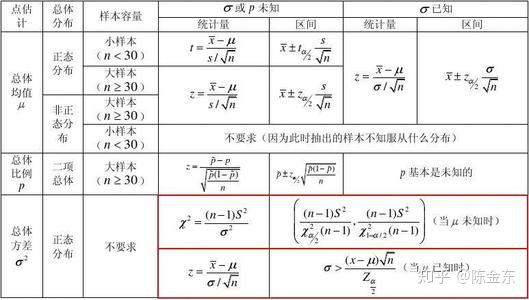



## 5.3 两个总体的区间估计





### 5.3.1 两个总体均值之差的置信区间

设两个总体的均值分别为$\mu_1$和$\mu_2$，从两个总体中分别抽取样本量为$n_1$和$n_2$的两个随机样本，其样本均值分别为$\bar{x}_1$和$\bar{x}_2$. 估计两个总体均值之差$(\mu_1-\mu_2)$的点估计量显然是两个样本的均值之差$(\bar{x}_1-\bar{x}_2)$ . 与估计一个样本的总体均值的区间估计类似，置信区间仍然是点估计 $\pm$ 估计误差。<p>
两个样本总体均值在$(1-\alpha)$置信水平下的置信区间可一般性地表达为：<p>
$$(\bar{x}_1-\bar{x}_2) \ \pm  ( Quantile  \times  Standard \  Error \  of \   (\bar{x}_1-\bar{x}_2)$$
#### （1）独立样本
**大样本**<p>
如果两个样本是从两个总体中独立抽取的，即一个样本中的元素与另一个样本中的元素相互独立，则称为**独立大样本**(independent sample)。<p>
如果两个样本都是大样本($n_1$,$n_2$)，其样本均值之差$(\bar{x}_1-\bar{x}_2)$近似服从期望为$(\mu_1-\mu_2)$，方差为($\frac{\sigma_{1}^{2}}{n_1}+\frac{\sigma_{2}^{2}}{n_2}$)的正态分布，经过标准化后，<p>
$$z=\dfrac{(\bar{x}_1-\bar{x}_2)-(\mu_1-\mu_2)}{\sqrt{\frac{\sigma_{1}^{2}}{n_1}+\frac{\sigma_{2}^{2}}{n_2}}} \sim N(0,1)$$
**当两个总体的方差$\frac{\sigma_{1}^{2}}{n_1}$和$\frac{\sigma_{2}^{2}}{n_2}$都已知时**，两个总体均值之差$(\mu_1-\mu_2)$在$(1-\alpha)$置信水平下的置信区间为：
$$(\bar{x}_1-\bar{x}_2)  \pm  z_{ \alpha / 2} \sqrt{ \frac{ \sigma_{1}^{2} }{ n_1 }+ \frac{ \sigma_{2}^{2} }{ n_2 } }$$
**两个总体的方差$\frac{\sigma_{1}^{2}}{n_1}$和$\frac{\sigma_{2}^{2}}{n_2}$未知时**，可以用样本方差$\frac{\sigma_{1}^{2}}{n_1}$和$\frac{\sigma_{2}^{2}}{n_2}$来代替，这时，两个总体均值之差$(\mu_1-\mu_2)$在$(1-\alpha)$置信水平下的置信区间为：
$$(\bar{x}_1-\bar{x}_2)  \pm  z_{ \alpha / 2} \sqrt{ \frac{ s_{1}^{2} }{ n_1 }+ \frac{ s_{2}^{2} }{ n_2 } }$$

**小样本**<p>
当两个样本均为独立小样本($n_1$<30和$n_2<30$)时，为估计两个总体均值之差，需要**假定两个总体服从正态分布**。<p>**当两个总体的方差$\sigma_{1}^{2}$和$\sigma_{2}^{2}$都已知时**，两个样本均值之差经标准化后服从**标准正态分布**。<p>
当两个总体的**方差$\sigma_{1}^{2}$和$\sigma_{2}^{2}$都未知时**，有如下两种情形：<p>
当两个总体的方差**未知但相等$\sigma_{1}^{2}=\sigma_{2}^{2}=\sigma_{}^{2}$时**，需要用两个样本的方差$\sigma_{1}^{2}$和$\sigma_{2}^{2}$来估计$\sigma_{}^{2}$,两个数据合并在一起，得到$\sigma^{2}$的合并估计量$\sigma_{}^{2}$<p>
$$s_{p}^2 = \frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}$$<p>
此时，两个样本均值之差标准化后服从自由度为($n_1+n_2-2$)的t分布，即<p>
$$t = \frac{(\bar{x}_1-\bar{x}_2)-(\mu_1-\mu_2)}{s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} \sim t(n_1+n_2-2) $$<p>
因此，两个总体均值之差$(\mu_1-\mu_2)$在$(1-\alpha/2)$置信水平下的置信区间为：<p>
$$(\bar{x}_1-\bar{x}_2) \pm t_{\alpha/2}(n_1+n_2-2)s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}} $$<p>
当**两个总体的方差未知且不相等时**，即$\sigma_1^2\neq\sigma_2^2$，两个样本均值之差标准化后近似服从自由度为v的t分布，自由度v的计算公式为：<p>
$$v=\frac{
	(
	\frac{s_1^2}{n_1}
	+\frac{s_2^2}{n_2}
	)^2
}{
	\frac{(s_1^2/n_1)^2}{n_1-1}
	+\frac{(s_2^2/n_2)^2}{n_2-1}}
$$<p>
两个总体均值之差$(\mu_1-\mu_2)$在$(1-\alpha/2)$置信水平下的置信区间为：
$$
(\bar{x}_1-\bar{x}_2) \pm t_{\alpha/2}(v)\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}} 
$$
    



#### （2）匹配样本<p>
配对样本(paired sample)，即一个样本中的数据与另一个样本中的数据相对应，这样的数据通常是对同一个体所作的前后两次测量。举例:先指定12个工人用第一种方法组装产品，然后再让这12个工人用另一种方法组装产品，这种得到两种方法组装产品的时间数据就是配对的数据。<P>
在大样本情况下，两个总体均值之差$\mu_d=\mu_1-\mu_2$在置信水平$(1-\alpha)$置信水平下的置信区间为：<p>
$$\bar{d}\pm z_{\alpha/2} \frac{\sigma_{d}}{\sqrt{n}}$$
式中，d表示两个配对数据的差值;$\bar{d}$表示各差值的均值；$\sigma_{d}$表示各差值的标准差。当总体$\sigma_{d}$未知时，可用样本的标准差$s_d$来代替。<p>
在小样本情况下，假定两个总体各观察值的配对差服从正态分布，两个总体均值之差$\mu_d=\mu_1-\mu_2$在置信水平$(1-\alpha)$置信水平下的置信区间为：<p>
$$\bar{d}\pm t_{\alpha/2}(n-1) \frac{s_{d}}{\sqrt{n}}$$
    



### 5.3.2 两个总体方差之比的置信区间

由上面学习内容可知样本方差满足卡方分布，并且两个卡方分布之比是F分布，则样本方差之比服从F分布。设两个独立样本的样本方差分别为$s_1^2$和$s_2^2$，总体方差分别为$\sigma_1^2$和$\sigma_2^2$，样本方差之比$s_1^2/s_2^2$的抽样分布服从自由度为$n_1-1,n_2-1$的$F$分布：<p>
$$\frac{s_1^2}{s_2^2}\times \frac{\sigma_1^2}{\sigma_2^2}\sim F(n_1-1,n_2-1)$$<p>
因此，使用$F$分布来构造总体方差之比的置信区间。在$1-\alpha$的置信水平下，总体方差的置信区间为：<p>
$$\frac{\mathrm{s}_1^2 / \mathrm{s}_2^{\dot{2}}}{\mathrm{~F}_{1-\alpha / 2}} \leq \frac{\mathrm{s}_1^2}{\mathrm{~s}_2^2} \leq \frac{\mathrm{s}_1^2 / \mathrm{s}_2^2}{\mathrm{~F}_{\alpha / 2}}$$<p>
其中，$F_{1-\alpha/2}$和$F_{\alpha/2}$为分子自由度为$(n_1-1)$、分母自由度为$(n_2-1)$的F分布两侧面积分别为$\alpha/2$和$1-\alpha/2$

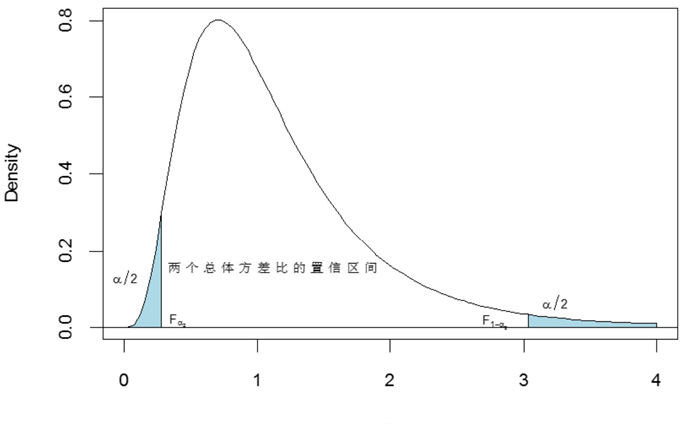



### 5.3.3 两个总体比例之差的置信区间

与一个样本的估计方法相同，两个总体比例的置信区间由$(\pi_1-\pi_2)$的点估计值$p_1-p_2\pm$估计误差得到，$(\pi_1-\pi_2)$在$(1-\alpha)$置信水平下的置信区间一般性地表达为：<p>
$$(p_1-p_2) \pm  ( Quantile  \times  Standard \  Error \  of \   (p_1-p_2)) $$<p>
设两个总体均服从二项分布，即$X_1 \sim B(n_1,p_1)$，$X_2 \sim B(n_2,p_2)$. $X_1$和$X_2$分别是$n_1$和$n_2$次独立Bernoulli试验成功的次数，$p_1$和$p_2$为成功的概率。<p>
由此可知，两个样本比例之差近似服从正态分布，而两个样本的比例之差经过标准化后则服从标准正态分布，即：<P>
$$
z= \frac{(p_1-p_2)-(\pi_1-\pi_2)}
{\sqrt{
\frac{\pi_1(1-\pi_1)}{n_1}+
\frac{\pi_2(1-\pi_2)}{n_2}
}} \sim N(0,1)$$
设两个独立样本的样本比例分别为$p_1$和$p_2$，总体比例分别为$\pi_1$和$\pi_2$，那么在$1-\alpha$置信水平下两个独立样本总体比例之差的置信区间为:<p>
$$
(p_1-p_2)\pm z_{\alpha/2}\sqrt{\frac{p_1(1-p_1)}{n_1}+\frac{p_2(1-p_2)}{n_2}}
$$<p>
同理，**对于任意样本**，通过修正样本量和比例来改进估计区间。
$$(\widetilde{p}_1-\widetilde{p}_2)\pm z_{\alpha/2}
\sqrt{
	\frac{\widetilde{p}_1(1-\widetilde{p}_1)}{\widetilde{n}_1}+
	\frac{\widetilde{p}_2(1-\widetilde{p}_2)}{\widetilde{n}_2}
}$$
其中，$\widetilde{n}_1=n_1+2$，$\widetilde{n}_2=n_2+2$，$\widetilde{p}_1=(X_1+1)/\widetilde{n}_1$，$\widetilde{p}_2=(X_2+1)/\widetilde{n}_2$   

### 5.3.4 总结
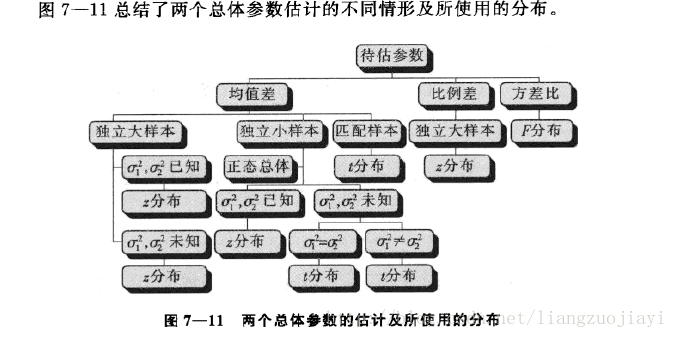

